In [24]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the json/dictionary data

In [25]:
data = "C:\\Users\\aleks\\Documents\\GitHub\\thesis\\src\\export-data\\vrenga-short.json"
with open(data, 'r') as f:
    track_data = json.load(f)

# Simple 2D Plot of Beat Ratios

In [26]:
filename = list(track_data)[0]
key_dict = track_data[filename]["ratios"]["beat_ratios"]

In [27]:
def plotting_beat_ratios(from_beat, to_beat):
    fig, ax = plt.subplots()
    width = 0.2  # the width of the bars

    labels = []
    beat1 = []
    beat2 = []
    beat3 = []

    for i, beat in enumerate(list(key_dict.values())):
        if i>=(from_beat-1) and i<(to_beat):
            beat1.append(beat[0])
            beat2.append(beat[1])
            beat3.append(beat[2])
            labels.append(list(key_dict)[i])
    
    x = np.arange(len(labels))  # the label locations

    ax.bar(x - width, beat1, width, label='beat1')
    ax.bar(x, beat2, width, label='beat2')
    ax.bar(x + width, beat3, width, label='beat3')

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Beat Ratios')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    fig.tight_layout()
    return fig

We can plot multiple sections/patterns of Beat Ratios as well

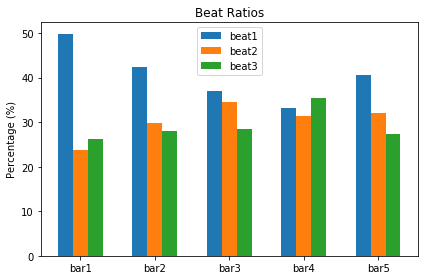

In [28]:
fig1 = plotting_beat_ratios(1, 5)

#fig2 = plotting_beat_ratios(14, 16)

## Plot the beat ratios of specifc harmonic patterns 

In [29]:
#updated function
def plotting_harm_pattr_beat(pattern):
    # create a plot
    fig, ax = plt.subplots()
    
    # the width of the bars
    width = 0.2
    
    # collect all the relevant bar numbers
    harm_pattr_beats = []
    for i in range(len(pattern)):
        if i%2 == 0:
            if i != (len(pattern)-1):
                count = pattern[i]
                while count <= pattern[i+1]:
                    harm_pattr_beats.append(count)
                    count += 1
            else:
                harm_pattr_beats.append(pattern[i])
                break

    labels = []
    beat1 = []
    beat2 = []
    beat3 = []

    for i, beat in enumerate(list(key_dict.values())):
        if i+1 in harm_pattr_beats:
            beat1.append(beat[0])
            beat2.append(beat[1])
            beat3.append(beat[2])
            labels.append(list(key_dict)[i])
    
    x = np.arange(len(labels))  # the label locations

    ax.bar(x - width, beat1, width, label='beat1')
    ax.bar(x, beat2, width, label='beat2')
    ax.bar(x + width, beat3, width, label='beat3')

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Beat Ratios')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    fig.tight_layout()
    return fig

In [30]:
#Excerpts of harmonic patterns examples from the track_data dict 
harmonic_pattern = [1, 3, 4, 6]
harmonic_pattern2 = [1, 1, 4, 4, 7, 7, 12, 12]
harmonic_pattern3 = [2, 3, 5, 6, 10, 11, 15, 16]

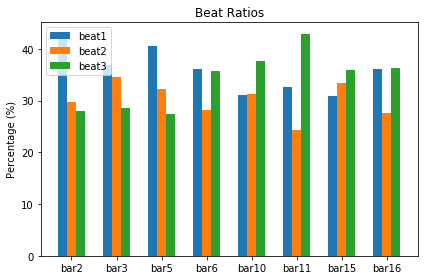

In [33]:
fig1 = plotting_harm_pattr_beat(harmonic_pattern3)

# Duration distributions of the beats

In [34]:
color_dict = {1 : '#FF0000', 2 : '#0000FF', 3: "#000000"}
df_dict = pd.DataFrame.from_dict(key_dict, orient="index", columns=[1, 2, 3])
df_dict.head()

,1,2,3
bar1,49.903382,23.768116,26.328502
bar2,42.342978,29.710656,27.946366
bar3,36.951501,34.565050,28.483449
bar4,33.260553,31.368268,35.371179
bar5,40.534171,32.128830,27.336999


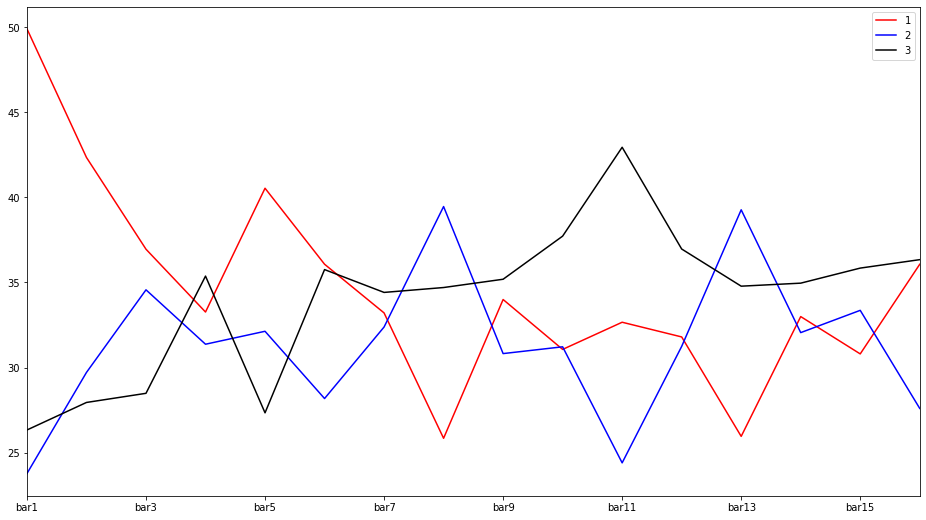

In [35]:
df_dict.plot(figsize=(16, 9), color=[color_dict.get(x) for x in df_dict.columns])

In the avobe plot, bar 8 - 11 and 13 - 16 are part of a pattern. We can see the fairly consistent timing distrubtion across harmonic patterns, but the durations of the individual beats change quite a bit from bar to bar. Probably "intesional" by the player to produce more variation (see Mats text).

Of course, here you also see the beats "motion" twords the next instance of that beat in the next bar, which actually makes little sense.

So maybe:

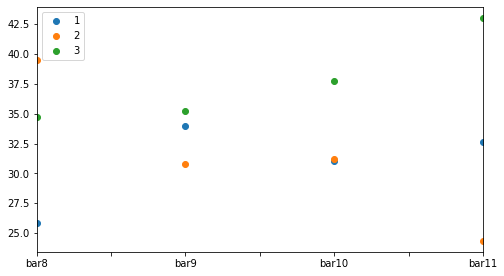

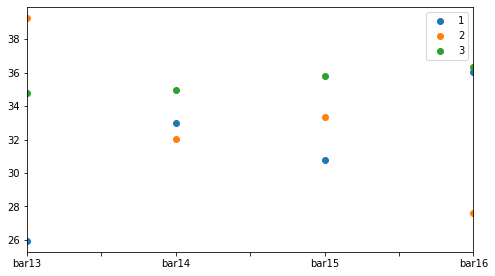

In [36]:
df_dict.loc["bar8":"bar11"].plot(figsize=(8, 4.5), style='o')
df_dict.loc["bar13":"bar16"].plot(figsize=(8, 4.5), style='o')

## Histogram representation

first beat:
second beat:
thrid beat:


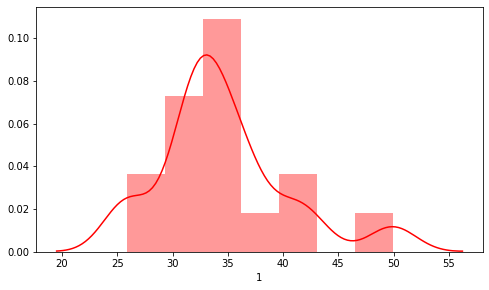

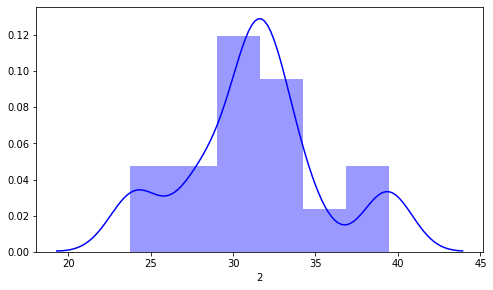

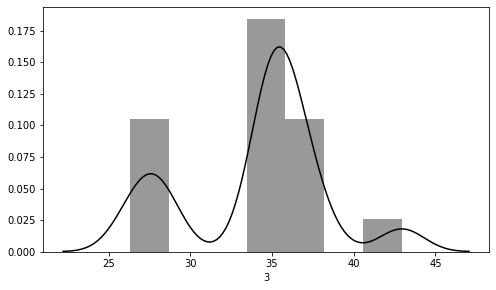

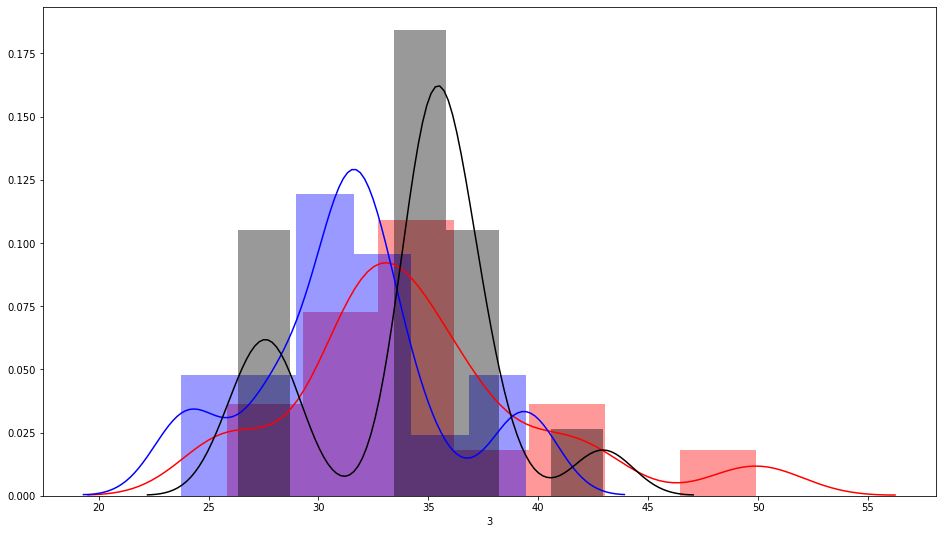

In [14]:
#df_dict.plot(kind='hist', y=[1], bins=20, color=[color_dict.get(1)])
#df_dict.plot(kind='hist', y=[2], bins=20, color=[color_dict.get(2)])
#df_dict.plot(kind='hist', y=[3], bins=20, color=[color_dict.get(3)])


fig, ax1 = plt.subplots(figsize=(8, 4.5))
sns.distplot(df_dict[1], ax=ax1, color=[1,0,0])
fig, ax2 = plt.subplots(figsize=(8, 4.5))
sns.distplot(df_dict[2], ax=ax2, color=[0,0,1])
fig, ax3 = plt.subplots(figsize=(8, 4.5))
sns.distplot(df_dict[3], ax=ax3, color=[0,0,0])

fig, ax4 = plt.subplots(figsize=(16,9))
sns.distplot(df_dict[1], ax=ax4, color=[1,0,0])
sns.distplot(df_dict[2], ax=ax4, color=[0,0,1])
sns.distplot(df_dict[3], ax=ax4, color=[0,0,0])

The general dist is quite "normal".

# Correlation between amount of notes in the beats and the length of those beats

Here we could also explore whether ornamented beats usually are prolonged or not.

In [17]:
# Create dataframe of the number of notes in every beat
filename = list(track_data)[0]
key_ndr = track_data[filename]["ratios"]["note_duration_ratios"]

lst_ndr = list(key_ndr.values())
lst_ndr_len = []
for i in range(len(lst_ndr)):
    if type(lst_ndr[i]) is list:
        lst_ndr_len.append(len(lst_ndr[i]))
    else:
        lst_ndr_len.append(1)

df_ndr_len = pd.DataFrame(lst_ndr_len, index=list(key_ndr), columns=["note_amount"])

In [18]:
# Concat with dataframe of the duration of every beat
filename = list(track_data)[0]
key_beat_dur = track_data[filename]["beat_onset_and_duration"]

# delete the "ending marker"
dict_copy = key_beat_dur.copy()
del dict_copy[list(key_beat_dur)[-1]]

df_bd = pd.DataFrame.from_dict(dict_copy, orient="index", columns=["onsets", "duration(ms)"])
del df_bd["onsets"]

In [20]:
# merge them together
df_ndr_bd = pd.concat([df_ndr_len, df_bd], axis=1)
df_ndr_bd.head()

,note_amount,duration(ms)
beat1.1,4,1033.0
beat1.2,3,492.0
beat1.3,2,545.0
beat2.1,4,600.0
beat2.2,3,421.0


In [22]:
print("Mean value of the beat duration duration(ms)")
print(df_ndr_bd["duration(ms)"].mean())
print("-------------------------------")
print("Mean value of the note amount per beat")              
print(df_ndr_bd["note_amount"].mean())

Mean value of the beat duration duration(ms)
453.9683333333333
-------------------------------
Mean value of the note amount per beat
2.9375


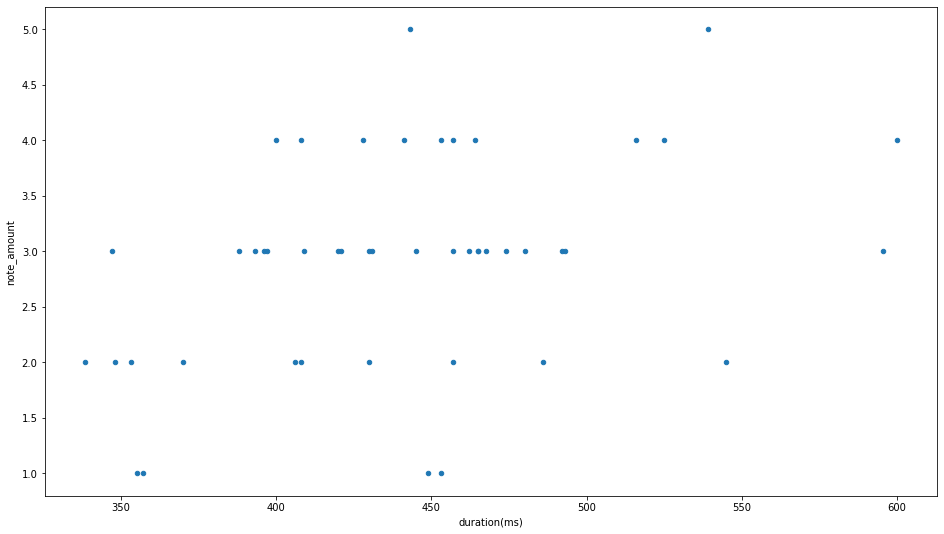

In [23]:
#df_ndr_bd.plot.scatter(figsize=(16, 9), x="duration(ms)", y="note_amount")

# Remove the "anomaly"
df_ndr_bd.loc["beat1.2":].plot.scatter(figsize=(16, 9), x="duration(ms)", y="note_amount")